# 1. Se plantean primero las librerías a emplear durante el desarollo.

In [1]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np.
import cv2
import os

# 2. Cargar las fotografías del producto, potenciadas con _Data Augmentation_

In [3]:
data = tf.keras.utils.image_dataset_from_directory('data', batch_size=8)

Found 351 files belonging to 2 classes.


In [4]:
data_iterator = data.as_numpy_iterator()

In [5]:
batch = data_iterator.next()

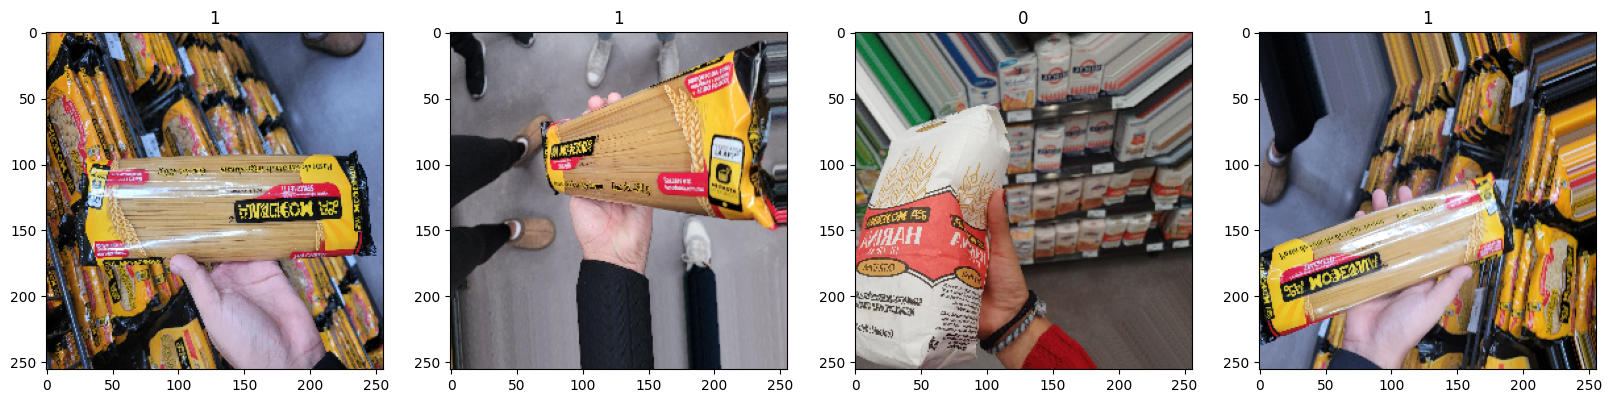

In [6]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Se escala la imagen para que ésta quede en un rango de 0 a 1 de forma que sea más fácil de procesar por la red neuronal.

In [7]:
data = data.map(lambda x,y: (x/255, y))

# 5. Se separa la información entre datos de entrenamiento, datos de validación y datos de testeo..

In [8]:
len(data)

44

In [9]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [10]:
#Se valida el tamaño de los conjuntos
train_size+val_size+test_size

44

In [11]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Diseño y arquitectura de la red neuronal.

In [13]:
model = Sequential()

In [14]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [15]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Entrenamiento de la red neuronal.

In [17]:
model.fit(train, epochs=30, validation_data=val)

Epoch 1/30


30/30 [==============================] - 7s 211ms/step - loss: 0.8110 - accuracy: 0.6083 - val_loss: 0.5622 - val_accuracy: 0.8333
Epoch 2/30
30/30 [==============================] - 7s 211ms/step - loss: 0.4992 - accuracy: 0.7542 - val_loss: 0.4992 - val_accuracy: 0.7222
Epoch 3/30
30/30 [==============================] - 7s 209ms/step - loss: 0.3437 - accuracy: 0.8625 - val_loss: 0.2714 - val_accuracy: 0.8889
Epoch 4/30
30/30 [==============================] - 7s 212ms/step - loss: 0.2215 - accuracy: 0.9125 - val_loss: 0.2478 - val_accuracy: 0.8889
Epoch 5/30
30/30 [==============================] - 7s 209ms/step - loss: 0.1402 - accuracy: 0.9708 - val_loss: 0.2110 - val_accuracy: 0.9028
Epoch 6/30
30/30 [==============================] - 7s 214ms/step - loss: 0.0496 - accuracy: 0.9917 - val_loss: 0.0233 - val_accuracy: 1.0000
Epoch 7/30
30/30 [==============================] - 7s 213ms/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 0.0634 - val_accuracy: 0.9861
Epoch 8/30
30/30 

In [18]:
from tensorflow.keras.models import load_model
model.save('./models/BinaryModerna.h5')

# 9. Evaluación de la red neuronal.

In [19]:
#Import load_model
# from tensorflow.keras.models import load_model
loss, accuracy = model.evaluate(train)
print(f'Train Accuracy: {accuracy}')
print(f'Train Loss: {loss}')

30/30 [==============================] - 2s 62ms/step - loss: 1.0959e-04 - accuracy: 1.0000
Train Accuracy: 1.0
Train Loss: 0.0001095915722544305


# 10. Test de la calidad de la red neuronal.

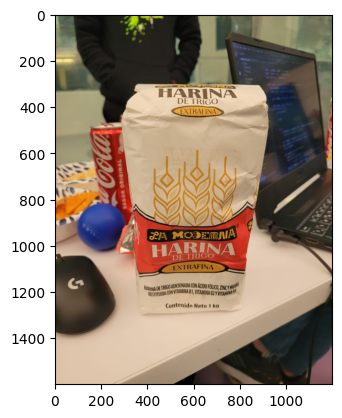

1/1 [==============================] - 0s 72ms/step
Predicted class is Spaghetti


In [20]:
tituloTest = 'FinalHarina.jpeg'
img = cv2.imread(tituloTest)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
resized_img = tf.image.resize(img, (256, 256))
preprocessed_img = np.expand_dims(resized_img / 255, 0)
predictions = model.predict(preprocessed_img)
if predictions > 0.5: 
    print(f'Predicted class is Spaghetti')
else:
    print(f'Predicted class is Harina')

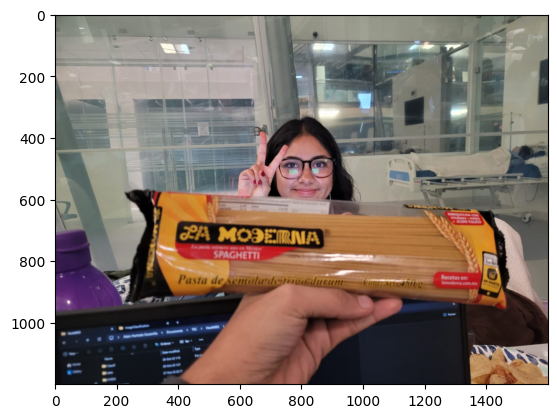

1/1 [==============================] - 0s 23ms/step
Predicted class is Harina


In [21]:
tituloTest = 'PruebaSpaghetti.jpeg'
img = cv2.imread(tituloTest)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
resized_img = tf.image.resize(img, (256, 256))
preprocessed_img = np.expand_dims(resized_img / 255, 0)
predictions = model.predict(preprocessed_img)
if predictions > 0.5: 
    print(f'Predicted class is Spaghetti')
else:
    print(f'Predicted class is Harina')

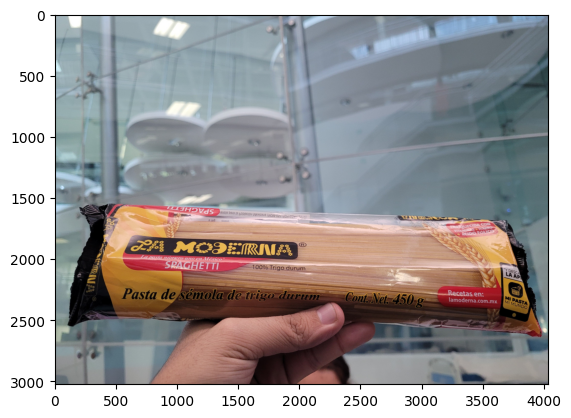

1/1 [==============================] - 0s 22ms/step
Predicted class is Spaghetti


In [22]:
tituloTest = 'PruebaSpaghettiv2.jpeg'
img = cv2.imread(tituloTest)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
resized_img = tf.image.resize(img, (256, 256))
preprocessed_img = np.expand_dims(resized_img / 255, 0)
predictions = model.predict(preprocessed_img)
if predictions > 0.5: 
    print(f'Predicted class is Spaghetti')
else:
    print(f'Predicted class is Harina')

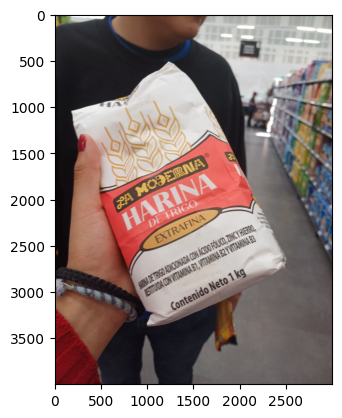

1/1 [==============================] - 0s 23ms/step
Predicted class is Harina


In [23]:
tituloTest = 'PruebaHarinav2.jpg'
img = cv2.imread(tituloTest)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
resized_img = tf.image.resize(img, (256, 256))
preprocessed_img = np.expand_dims(resized_img / 255, 0)
predictions = model.predict(preprocessed_img)
if predictions > 0.5: 
    print(f'Predicted class is Spaghetti')
else:
    print(f'Predicted class is Harina')